In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from ultralytics import YOLO
from sklearn.decomposition import PCA
import pickle
import yaml
import torch
import torch.nn as nn
import torchvision
%matplotlib inline
import seaborn as sns

In [2]:
'''data={
    'train': 'C:/Users/Predator/Desktop/gpu_env_folder/dataset1/images/train',
    'val': 'C:/Users/Predator/Desktop/gpu_env_folder/dataset1/images/val',


    'nc':1,
    'names': {
        '0': 'non-spherical'
    }
}'''

data3={
    'train': 'C:/Users/Predator/Desktop/gpu_env_folder/AA_PProject/dataset_red&trans/images/train',
    'val': 'C:/Users/Predator/Desktop/gpu_env_folder/AA_PProject/dataset_red&trans/images/val',


    'nc':1,
    'names': {
        '0': 'non-spherical'
    }
}


In [3]:
with open('C:/Users/Predator/Desktop/gpu_env_folder/AA_PProject/dataset_red&trans/data3.yaml','w')  as file:
    yaml.dump(data3, file, default_flow_style=False)

In [4]:
# Load the small YOLOv8 model
model_v8s = YOLO('yolov8s.pt')  # Use 'yolov8s.pt' for small architecture

# Train the model
results_v8s = model_v8s.train(
    data="C:/Users/Predator/Desktop/gpu_env_folder/AA_PProject/dataset_red&trans/data3.yaml",
    epochs=110,  # Number of epochs
    imgsz=640,   # Image size
    batch=32,    # Batch size (adjust as needed)
    #lrf=0.01,    # Learning rate schedule factor
    #lr0=0.01,    # Initial learning rate
    #lr1=0.01     # Final learning rate
)

New https://pypi.org/project/ultralytics/8.3.12 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.94  Python-3.8.19 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/Predator/Desktop/gpu_env_folder/AA_PProject/dataset_red&trans/data3.yaml, epochs=110, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

train: Scanning C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\dataset_red&trans\labels\train.cache... 11 images,
val: Scanning C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\dataset_red&trans\labels\val.cache... 6 images, 0 ba


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 110 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/110      3.43G      2.686      3.825      1.563       1205        640: 100%|██████████| 1/1 [00:02<00:00,  2.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326    0.00111    0.00613   0.000564   0.000395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/110       3.3G      2.663       3.84      1.609       1236        640: 100%|██████████| 1/1 [00:00<00:00,  1.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326    0.00111    0.00613   0.000564   0.000394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/110      3.36G      3.046      3.803      1.788       1211        640: 100%|██████████| 1/1 [00:00<00:00,  1.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326    0.00111    0.00613   0.000563   0.000365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/110      3.37G      2.589      3.869      1.613       1076        640: 100%|██████████| 1/1 [00:00<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326    0.00111    0.00613   0.000562   0.000393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/110       2.9G      2.232      3.964      1.464        765        640: 100%|██████████| 1/1 [00:00<00:00,  1.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326    0.00111    0.00613   0.000561   0.000364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/110      3.46G      2.534      4.036      1.533       1294        640: 100%|██████████| 1/1 [00:00<00:00,  1.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.02       0.11     0.0112    0.00738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/110      3.17G      1.852      2.506      1.185        934        640: 100%|██████████| 1/1 [00:00<00:00,  1.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.651      0.622      0.635      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/110      3.48G      1.557      1.282      1.038       1093        640: 100%|██████████| 1/1 [00:00<00:00,  1.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.654      0.872      0.735      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/110      3.45G      1.361      1.289     0.9706       1071        640: 100%|██████████| 1/1 [00:00<00:00,  1.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.565      0.951      0.823      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/110      3.34G      1.282      1.036     0.9508       1092        640: 100%|██████████| 1/1 [00:00<00:00,  1.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.677      0.954      0.878      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/110      3.33G       1.29     0.8041     0.9454       1174        640: 100%|██████████| 1/1 [00:00<00:00,  1.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.757      0.957        0.9      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/110      3.34G      1.191     0.9295     0.9277        896        640: 100%|██████████| 1/1 [00:00<00:00,  1.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.764      0.975      0.902      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/110      3.43G      1.327      0.852     0.9123       1458        640: 100%|██████████| 1/1 [00:00<00:00,  1.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.754      0.997      0.898      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/110      3.41G      1.173     0.9261     0.8935       1077        640: 100%|██████████| 1/1 [00:00<00:00,  1.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.763      0.994      0.885      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/110      3.23G       1.13      0.833     0.8965        894        640: 100%|██████████| 1/1 [00:00<00:00,  1.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.771      0.991      0.896      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/110      3.35G      1.174      0.806     0.9029       1094        640: 100%|██████████| 1/1 [00:00<00:00,  1.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.77      0.988      0.902      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/110      3.37G      1.309     0.7945     0.9047       1114        640: 100%|██████████| 1/1 [00:00<00:00,  1.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.765      0.994        0.9      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/110      3.22G      1.069     0.7573     0.8867       1021        640: 100%|██████████| 1/1 [00:00<00:00,  1.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.756      0.985      0.896      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/110      3.22G      1.095     0.8465     0.8621        993        640: 100%|██████████| 1/1 [00:00<00:00,  1.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.755      0.988      0.894       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/110      3.46G      1.256      0.869     0.8865       1250        640: 100%|██████████| 1/1 [00:00<00:00,  1.52
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.76      0.982      0.889      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/110      3.23G      1.226     0.9391     0.9185        756        640: 100%|██████████| 1/1 [00:00<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.786      0.954      0.891      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/110       3.2G      1.114     0.9284     0.8961        974        640: 100%|██████████| 1/1 [00:00<00:00,  1.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.78      0.942      0.901      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/110       3.4G      1.146     0.8104      0.871       1104        640: 100%|██████████| 1/1 [00:00<00:00,  1.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.761      0.966      0.905      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/110      3.31G      1.253     0.8902     0.8835       1009        640: 100%|██████████| 1/1 [00:00<00:00,  1.61
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.783      0.936       0.91      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/110      3.42G      1.049      0.751      0.889        990        640: 100%|██████████| 1/1 [00:00<00:00,  1.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.784      0.902      0.907      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/110      3.41G      1.156     0.7152     0.8742       1199        640: 100%|██████████| 1/1 [00:00<00:00,  1.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326        0.8      0.883        0.9      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/110      3.22G      1.135     0.7573     0.8713       1032        640: 100%|██████████| 1/1 [00:00<00:00,  1.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.822      0.877      0.894      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/110      3.12G      1.145     0.7996      0.899        685        640: 100%|██████████| 1/1 [00:00<00:00,  1.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.817      0.876      0.892      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/110      3.25G      1.111      0.875     0.8851       1057        640: 100%|██████████| 1/1 [00:00<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.812      0.876      0.885       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/110      3.23G      1.146     0.8549      0.894       1010        640: 100%|██████████| 1/1 [00:00<00:00,  1.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.778       0.83      0.821       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/110      3.48G      1.066     0.7543     0.8821       1043        640: 100%|██████████| 1/1 [00:00<00:00,  1.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.734      0.803        0.8      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/110      3.27G      1.082     0.6596      0.885       1105        640: 100%|██████████| 1/1 [00:00<00:00,  1.75
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.734      0.797      0.776      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/110       3.2G          1     0.7476      0.894        701        640: 100%|██████████| 1/1 [00:00<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.713      0.855      0.786       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/110      3.42G      1.054     0.7034     0.8591       1163        640: 100%|██████████| 1/1 [00:00<00:00,  1.53
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.74      0.871       0.81      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/110      3.31G     0.9674     0.6516     0.8802        796        640: 100%|██████████| 1/1 [00:00<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.791      0.831      0.805      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/110       3.4G      1.025     0.6678     0.8797       1357        640: 100%|██████████| 1/1 [00:00<00:00,  1.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.801      0.877      0.818      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/110      3.08G     0.9145     0.7138     0.8495        655        640: 100%|██████████| 1/1 [00:00<00:00,  1.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.821      0.807       0.81      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/110      3.42G     0.9862     0.7057      0.873       1023        640: 100%|██████████| 1/1 [00:00<00:00,  1.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.847      0.871      0.848      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/110      3.44G      1.088     0.6937     0.8657       1056        640: 100%|██████████| 1/1 [00:00<00:00,  1.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.778      0.982      0.872      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/110      3.36G      1.079     0.6898      0.853       1116        640: 100%|██████████| 1/1 [00:00<00:00,  1.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.737      0.994      0.803      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/110      3.25G      1.065     0.6433     0.8898       1127        640: 100%|██████████| 1/1 [00:00<00:00,  1.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.745      0.997      0.832      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/110      3.38G      1.043     0.6533     0.8553       1391        640: 100%|██████████| 1/1 [00:00<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.75      0.997      0.841       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/110      3.19G      1.012     0.6636     0.8871        898        640: 100%|██████████| 1/1 [00:00<00:00,  1.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.739      0.985      0.859      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/110      3.41G      1.019       0.65     0.8851       1162        640: 100%|██████████| 1/1 [00:00<00:00,  1.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.776      0.942      0.869      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/110      3.18G     0.9792     0.6246      0.858        836        640: 100%|██████████| 1/1 [00:00<00:00,  1.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.86      0.847      0.883      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/110      3.37G     0.9736     0.6509     0.8643        888        640: 100%|██████████| 1/1 [00:00<00:00,  1.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.879      0.831      0.835      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/110       3.2G      1.025     0.6952     0.8844        763        640: 100%|██████████| 1/1 [00:00<00:00,  1.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.784      0.991      0.886      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/110      3.24G     0.9709     0.7359     0.8688        946        640: 100%|██████████| 1/1 [00:00<00:00,  1.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.801      0.962      0.893      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/110      3.45G      1.046     0.8169     0.8663       1043        640: 100%|██████████| 1/1 [00:00<00:00,  1.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.802      0.972      0.901      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/110      3.38G     0.9288     0.6527      0.863        906        640: 100%|██████████| 1/1 [00:00<00:00,  1.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.779      0.991      0.894      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/110      3.06G     0.8803     0.6103     0.8574        791        640: 100%|██████████| 1/1 [00:00<00:00,  1.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.779      0.991      0.894      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/110       3.5G     0.9217     0.6294     0.8546       1048        640: 100%|██████████| 1/1 [00:00<00:00,  1.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.768      0.991      0.841      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/110      3.38G     0.9916     0.6762     0.8514       1016        640: 100%|██████████| 1/1 [00:00<00:00,  1.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.768      0.991      0.841      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/110      3.19G     0.9182      0.644     0.8577        828        640: 100%|██████████| 1/1 [00:00<00:00,  1.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.76       0.99      0.834      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/110      3.31G      1.052     0.6744     0.8564       1242        640: 100%|██████████| 1/1 [00:00<00:00,  1.85
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.76       0.99      0.834      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/110      3.38G     0.8906     0.6063     0.8574        873        640: 100%|██████████| 1/1 [00:00<00:00,  1.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.763      0.994       0.84      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/110       3.3G     0.9186     0.6022     0.8607       1000        640: 100%|██████████| 1/1 [00:00<00:00,  1.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.763      0.994       0.84      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/110      3.32G     0.9113     0.6423     0.8549        970        640: 100%|██████████| 1/1 [00:00<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.774      0.997      0.865      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/110       3.2G     0.9732     0.6174      0.881       1045        640: 100%|██████████| 1/1 [00:00<00:00,  1.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.774      0.997      0.865      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/110      3.45G     0.9988     0.6093     0.8485       1059        640: 100%|██████████| 1/1 [00:00<00:00,  1.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.774      0.994      0.872      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/110      3.33G     0.8873     0.6394      0.855       1087        640: 100%|██████████| 1/1 [00:00<00:00,  1.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.774      0.994      0.872      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/110      3.33G     0.9474     0.6116     0.8639       1031        640: 100%|██████████| 1/1 [00:00<00:00,  1.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.788      0.985      0.872      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/110       3.5G      1.008     0.5821     0.8486       1212        640: 100%|██████████| 1/1 [00:00<00:00,  1.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.788      0.985      0.872      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/110      3.25G     0.9133     0.6569     0.8549        854        640: 100%|██████████| 1/1 [00:00<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.79      0.981       0.87      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/110      3.27G     0.9304     0.6263     0.8561       1122        640: 100%|██████████| 1/1 [00:00<00:00,  1.87
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.79      0.981       0.87      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/110      3.15G     0.9353     0.6181     0.8637        803        640: 100%|██████████| 1/1 [00:00<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.804      0.966      0.881      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/110      3.16G     0.8393     0.5815     0.8575        756        640: 100%|██████████| 1/1 [00:00<00:00,  1.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.804      0.966      0.881      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/110       3.4G      1.014     0.6177     0.8615        962        640: 100%|██████████| 1/1 [00:00<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.811      0.947      0.894      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/110      3.45G      1.112     0.6258     0.8509       1427        640: 100%|██████████| 1/1 [00:00<00:00,  1.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.811      0.947      0.894      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/110      3.42G     0.9493     0.6248     0.8625       1143        640: 100%|██████████| 1/1 [00:00<00:00,  1.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.808      0.954      0.893      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/110      3.22G     0.8939     0.5946     0.8392       1225        640: 100%|██████████| 1/1 [00:00<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.808      0.954      0.893      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/110      3.52G      1.015     0.6189     0.8555       1242        640: 100%|██████████| 1/1 [00:00<00:00,  1.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.79      0.993      0.847      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/110      3.38G     0.9172     0.5526     0.8393       1231        640: 100%|██████████| 1/1 [00:00<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326       0.79      0.993      0.847      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/110       3.1G      0.952     0.6321     0.8696        606        640: 100%|██████████| 1/1 [00:00<00:00,  1.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.781      0.994      0.863      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/110      3.31G     0.8976     0.5586     0.8455        929        640: 100%|██████████| 1/1 [00:00<00:00,  1.89
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.781      0.994      0.863      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/110      3.28G     0.8752     0.5919     0.8363        944        640: 100%|██████████| 1/1 [00:00<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.785          1      0.869      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/110      3.24G     0.8839     0.6238     0.8493        865        640: 100%|██████████| 1/1 [00:00<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.785          1      0.869      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/110      3.32G     0.9105     0.5666     0.8401       1329        640: 100%|██████████| 1/1 [00:00<00:00,  1.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.783          1      0.876      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/110      3.42G       0.85     0.5581     0.8363       1073        640: 100%|██████████| 1/1 [00:00<00:00,  1.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.783          1      0.876      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/110       3.5G     0.9527     0.7522     0.8384       1094        640: 100%|██████████| 1/1 [00:00<00:00,  1.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.796          1      0.886      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/110      3.26G     0.8813     0.5723     0.8392        765        640: 100%|██████████| 1/1 [00:00<00:00,  1.87
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.796          1      0.886      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/110      3.54G     0.8442     0.5407      0.837        991        640: 100%|██████████| 1/1 [00:00<00:00,  1.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.814      0.938      0.899      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/110      3.22G     0.8958     0.5959     0.8412       1013        640: 100%|██████████| 1/1 [00:00<00:00,  1.42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.814      0.938      0.899      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/110      3.11G     0.8607     0.5696     0.8522        689        640: 100%|██████████| 1/1 [00:00<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.849      0.911      0.869      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/110      3.06G     0.8147     0.6351      0.852        955        640: 100%|██████████| 1/1 [00:00<00:00,  1.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.849      0.911      0.869      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/110      3.47G     0.8144     0.5507     0.8408        921        640: 100%|██████████| 1/1 [00:00<00:00,  1.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.912      0.866       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/110      3.36G     0.8377     0.5747     0.8516        955        640: 100%|██████████| 1/1 [00:00<00:00,  1.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.912      0.866       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/110      3.27G     0.9128     0.5507     0.8534       1138        640: 100%|██████████| 1/1 [00:00<00:00,  1.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.852      0.899      0.863      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/110      3.24G     0.9504       0.53     0.8437       1098        640: 100%|██████████| 1/1 [00:00<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.852      0.899      0.863      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/110       3.5G     0.9606      0.539     0.8402       1342        640: 100%|██████████| 1/1 [00:00<00:00,  1.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.848      0.902      0.863      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/110      3.21G     0.8923     0.5944     0.8344       1063        640: 100%|██████████| 1/1 [00:00<00:00,  1.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.848      0.902      0.863      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/110      3.21G     0.8428     0.5107       0.84       1041        640: 100%|██████████| 1/1 [00:00<00:00,  1.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.845      0.906      0.865      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/110      3.44G     0.9226     0.5492      0.835       1669        640: 100%|██████████| 1/1 [00:00<00:00,  1.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.845      0.906      0.865      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/110      3.25G     0.8675      0.538     0.8412        903        640: 100%|██████████| 1/1 [00:00<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.917      0.875      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/110      3.21G     0.8498     0.5469     0.8521        916        640: 100%|██████████| 1/1 [00:00<00:00,  1.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.917      0.875      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/110      3.13G     0.8467     0.4853     0.8445        807        640: 100%|██████████| 1/1 [00:00<00:00,  1.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.852      0.902      0.884      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/110       3.3G     0.8968     0.5478     0.8448       1413        640: 100%|██████████| 1/1 [00:00<00:00,  1.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.852      0.902      0.884      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/110      3.36G      0.894     0.5746     0.8295       1359        640: 100%|██████████| 1/1 [00:00<00:00,  1.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.854      0.902      0.891      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/110      3.28G     0.9002     0.5785     0.8619        844        640: 100%|██████████| 1/1 [00:00<00:00,  1.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.854      0.902      0.891      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/110      3.28G     0.7573     0.5261     0.8417        823        640: 100%|██████████| 1/1 [00:00<00:00,  1.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.857      0.901      0.897      0.683


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/110      3.47G     0.9124     0.5972     0.8568        581        640: 100%|██████████| 1/1 [00:06<00:00,  6.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.857      0.901      0.897      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/110      3.51G     0.8662     0.5322     0.8538        581        640: 100%|██████████| 1/1 [00:00<00:00,  1.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.852      0.899      0.903      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/110      3.47G      0.808     0.4981     0.8462        581        640: 100%|██████████| 1/1 [00:00<00:00,  2.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.852      0.899      0.903      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/110      3.51G     0.8662     0.6512     0.8389        581        640: 100%|██████████| 1/1 [00:00<00:00,  1.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.839      0.913      0.909      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/110      3.47G     0.8072     0.5214     0.8632        581        640: 100%|██████████| 1/1 [00:00<00:00,  2.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.839      0.913      0.909      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/110      3.51G     0.8132     0.5461     0.8473        581        640: 100%|██████████| 1/1 [00:00<00:00,  1.75
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.841      0.908      0.916      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/110      3.47G     0.8147     0.5619     0.8249        581        640: 100%|██████████| 1/1 [00:00<00:00,  1.98
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.841      0.908      0.916      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/110      3.51G     0.8351     0.5785     0.8224        581        640: 100%|██████████| 1/1 [00:00<00:00,  1.85
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.908       0.92      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/110      3.47G      0.815     0.5259     0.8411        581        640: 100%|██████████| 1/1 [00:00<00:00,  2.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.908       0.92      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/110      3.51G      0.788      0.498     0.8361        581        640: 100%|██████████| 1/1 [00:00<00:00,  1.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          6        326      0.844      0.908       0.92      0.711



110 epochs completed in 0.068 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 22.5MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.94  Python-3.8.19 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          6        326      0.844      0.908       0.92       0.71
Speed: 0.4ms preprocess, 23.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs\detect\train3


In [5]:

video_path = r'C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\videos\fr24_start30sec.mp4'
output_path = r'C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\output\fr24_start30sec.mp4'

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
i=1
bounding_boxes = {}
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    results = model_v8s.predict(frame)
    
    for result in results:
        bounding_boxes[i] = result.boxes.xyxy  
        boxes = result.boxes.xyxy   
        #confidences = result.boxes.conf  
        classes = result.boxes.cls  
        #print(f'iteration {i} complete')
        
        for box, cls in zip(boxes, classes):
            x1, y1, x2, y2 = box  
            #conf = float(conf)  
            cls = int(cls)  
            
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            
            label = f'Class: {cls}'
            cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

    print("Writing frame to output video", i)
    i+=1
    out.write(frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()




0: 384x640 51 non-sphericals, 240.4ms
Speed: 4.0ms preprocess, 240.4ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Writing frame to output video 1

0: 384x640 51 non-sphericals, 50.1ms
Speed: 2.0ms preprocess, 50.1ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Writing frame to output video 2

0: 384x640 50 non-sphericals, 52.0ms
Speed: 6.0ms preprocess, 52.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Writing frame to output video 3

0: 384x640 49 non-sphericals, 49.9ms
Speed: 6.0ms preprocess, 49.9ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)
Writing frame to output video 4

0: 384x640 52 non-sphericals, 47.0ms
Speed: 5.0ms preprocess, 47.0ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)
Writing frame to output video 5

0: 384x640 49 non-sphericals, 38.1ms
Speed: 4.0ms preprocess, 38.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)
Writing frame to output vide

In [7]:
output_path = r'C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\output\fr18_last30se_anglec.mp4'

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_index=1
angle_list = []
angle_dict_withContours = {}
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    #print(frame_index)
    if frame_index in bounding_boxes:
        boxes = bounding_boxes[frame_index]
        j=1
        for box in boxes:
            co_ord = [int(item.item()) for item in box]
            x1, y1, x2, y2 = co_ord

            roi = frame[y1:y2, x1:x2]
            
            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

            blurred = cv2.GaussianBlur(gray, (5, 5), 0)

            binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                           cv2.THRESH_BINARY_INV, 11, 2)

            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            if contours:
                contour = max(contours, key=cv2.contourArea)
                contour = contour.reshape(-1, 2)
                if contour.shape[0] >= 2:
                    pca = PCA(n_components=2)
                    pca.fit(contour)
                    angle = np.arctan2(pca.components_[0, 1], pca.components_[0, 0]) * 180 / np.pi
                    if angle < 0:
                        angle = 180 - abs(angle)
                    angle_list.append(angle)
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    #cv2.putText(frame, f'{j}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                    cv2.putText(frame, f'{j}:{angle:.2f}', (x1, y2 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
            

    angle_dict_withContours[frame_index] = angle_list
    angle_list = []
    print(f'frame {frame_index}th complete')
    out.write(frame)
    frame_index += 1

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


frame 1th complete
frame 2th complete
frame 3th complete
frame 4th complete
frame 5th complete
frame 6th complete
frame 7th complete
frame 8th complete
frame 9th complete
frame 10th complete
frame 11th complete
frame 12th complete
frame 13th complete
frame 14th complete
frame 15th complete
frame 16th complete
frame 17th complete
frame 18th complete
frame 19th complete
frame 20th complete
frame 21th complete
frame 22th complete
frame 23th complete
frame 24th complete
frame 25th complete
frame 26th complete
frame 27th complete
frame 28th complete
frame 29th complete
frame 30th complete
frame 31th complete
frame 32th complete
frame 33th complete
frame 34th complete
frame 35th complete
frame 36th complete
frame 37th complete
frame 38th complete
frame 39th complete
frame 40th complete
frame 41th complete
frame 42th complete
frame 43th complete
frame 44th complete
frame 45th complete
frame 46th complete
frame 47th complete
frame 48th complete
frame 49th complete
frame 50th complete
frame 51t

44


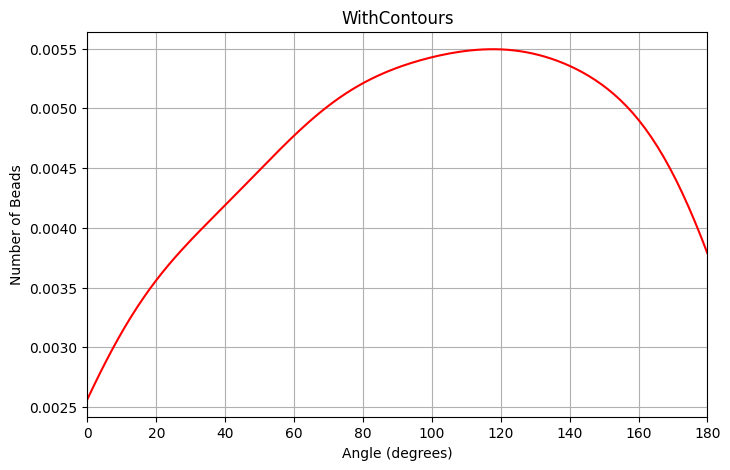

44


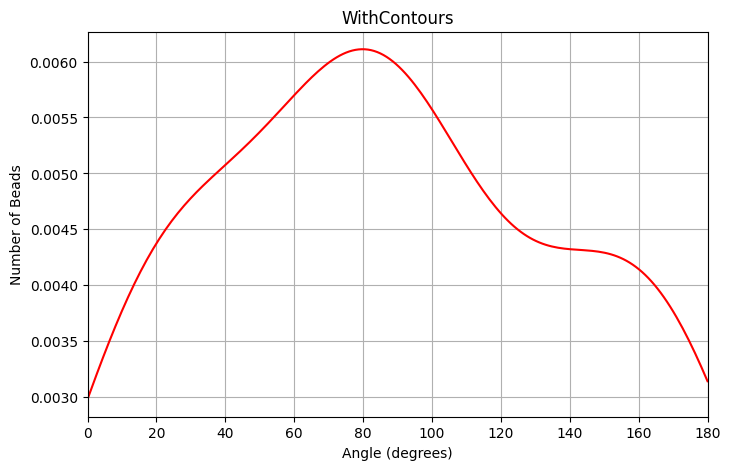

50


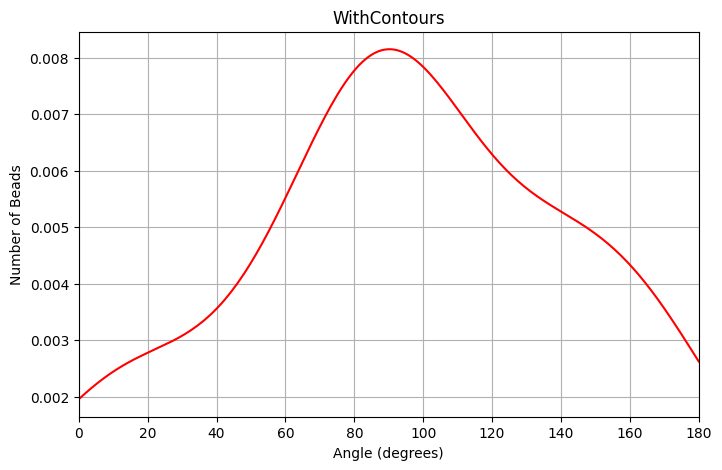

46


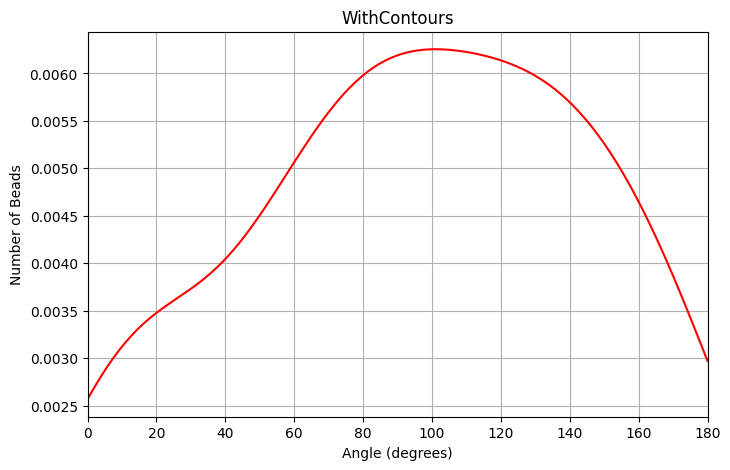

70


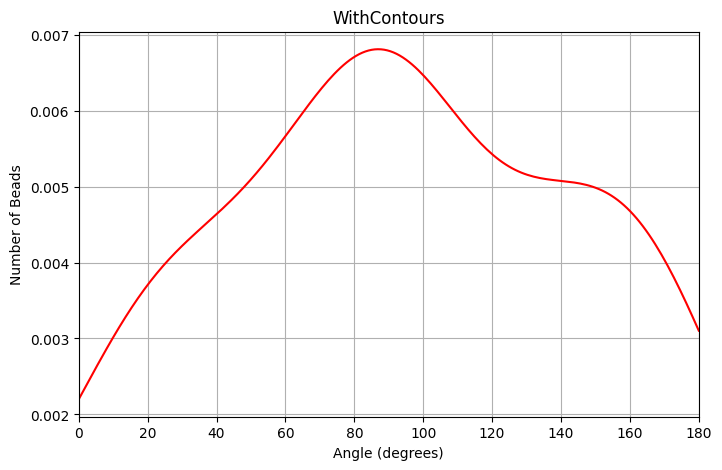

68


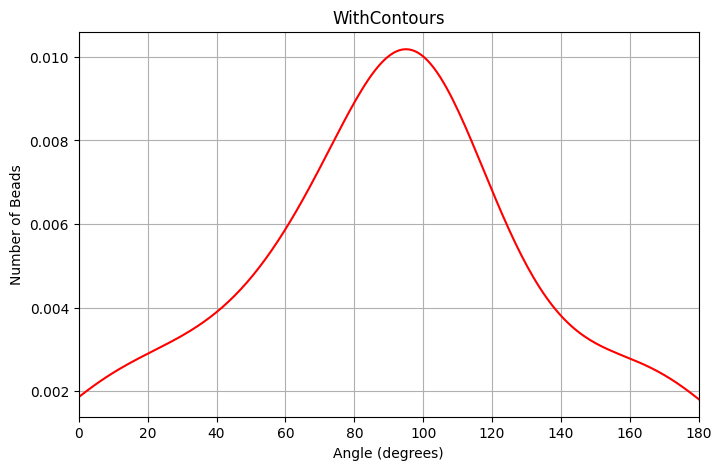

70


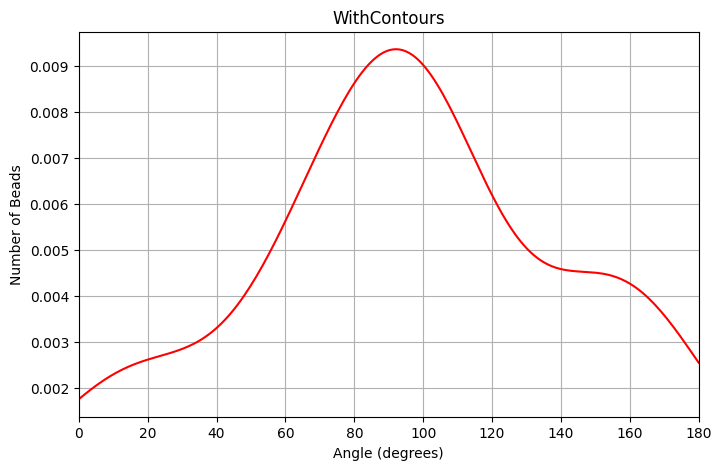

71


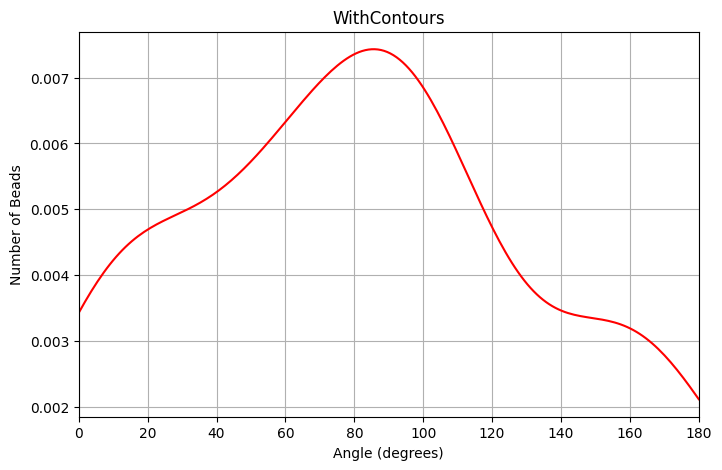

61


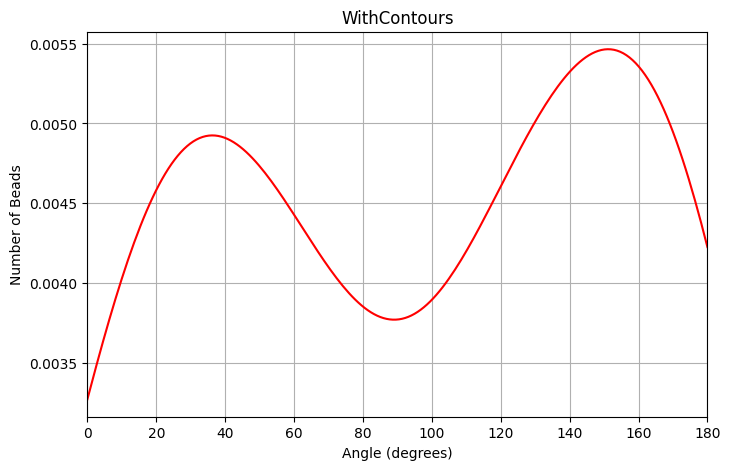

70


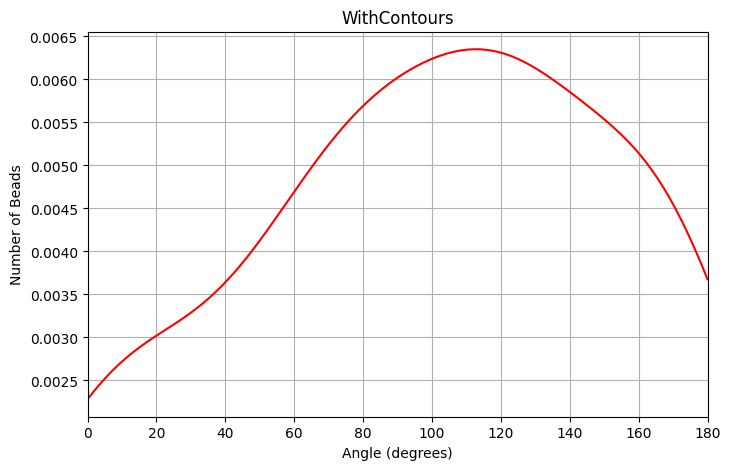

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for frame, angles in angle_dict_withContours.items():
    if frame % 100 == 0:
        abs_angle_list = [abs(angle) for angle in angles]   
        print(len(abs_angle_list))

        # Step 2: Create a new figure for each frame
        plt.figure(figsize=(8, 5))
        
        # Step 3: Plot the KDE (ensure it's between 0 and 180)
        sns.kdeplot(abs_angle_list, color='red', label='PDF (KDE)', clip=(0, 180))

        # Step 4: Customize the plot with frame-specific title and labels
        plt.title(f'WithContours')
        plt.xlabel('Angle (degrees)')
        plt.ylabel('Number of Beads')
        plt.grid(True)

        # Set x-axis limits to 0 to 180 degrees
        plt.xlim(0, 180)

        # Step 5: Show the plot for the current frame
        plt.show(block=True)


In [13]:
from sklearn.decomposition import PCA
import copy
import cv2
import numpy as np

output_path = r'C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\output\fr18_last30sec_3div.mp4'

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

angle_dict_region = {}

frame_index = 1
stacking_height = None  

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    angle_dict_region[frame_index] = {'top': [], 'middle': [], 'bottom': []}

    if frame_index in bounding_boxes.keys():
        boxes = bounding_boxes[frame_index]
        if boxes.nelement() > 0:
            if stacking_height is None:

                lowest_y1 = min([int(box[1].item()) for box in boxes])  # Find the bounding box with the lowest y1 value
                stacking_height = lowest_y1
                region_height = (height - stacking_height) // 3

                # Calculate constant division lines
                top_line = stacking_height + region_height
                middle_line = stacking_height + 2 * region_height

            # Draw the constant division lines
            cv2.line(frame, (0, stacking_height), (width, stacking_height), (255, 0, 0), 2)  # Stacking start
            cv2.line(frame, (0, top_line), (width, top_line), (255, 0, 0), 2)  # Top region line
            cv2.line(frame, (0, middle_line), (width, middle_line), (255, 0, 0), 2)  # Middle region line

            # Label the regions (top, middle, bottom) near the division lines
            cv2.putText(frame, 'Top', (10, stacking_height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
            cv2.putText(frame, 'Middle', (10, top_line - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
            cv2.putText(frame, 'Bottom', (10, middle_line - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            for j, box in enumerate(boxes):
                x1, y1, x2, y2 = [int(item.item()) for item in box]
                roi = frame[y1:y2, x1:x2]

                gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                blurred = cv2.GaussianBlur(gray, (5, 5), 0)
                binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY_INV, 11, 2)

                contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    contour = max(contours, key=cv2.contourArea)
                    contour = contour.reshape(-1, 2)
                    if contour.shape[0] >= 2:
                        pca = PCA(n_components=2)
                        pca.fit(contour)
                        angle = np.arctan2(pca.components_[0, 1], pca.components_[0, 0]) * 180 / np.pi
                        if angle < 0:
                            angle = 180 - abs(angle)

                        # Calculate the center y-coordinate of the bounding box
                        center_y = (y1 + y2) // 2

                        # Determine which vertical region the bead belongs to
                        if center_y < stacking_height + region_height:
                            region = 'top'
                        elif center_y < stacking_height + 2 * region_height:
                            region = 'middle'
                        else:
                            region = 'bottom'

                        # Append angle to corresponding region for this frame
                        angle_dict_region[frame_index][region].append(angle)

                        # Draw the bounding box and label
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                        cv2.putText(frame, f'{j+1}: {angle:.2f}°', (x1, y2 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
        else:
                print(f"No bounding boxes for frame {frame_index}")

    out.write(frame)
    print(f"Processing frame {frame_index}")
    frame_index += 1

# Release resources
cap.release()
out.release()

# Plot the distribution of angles for each vertical region
'''
for region in ['top', 'middle', 'bottom']:
    plt.figure()
    all_angles = [angle for frame_data in angle_dict_region.values() for angle in frame_data[region]]
    plt.hist(all_angles, bins=30, alpha=0.75, color='blue')
    plt.title(f'Angle Distribution in {region.capitalize()} Region')
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Number of Beads')
    plt.show()
'''


Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing frame 47
Processing frame 48
Processing frame 49
Processing frame 50
Processin

"\nfor region in ['top', 'middle', 'bottom']:\n    plt.figure()\n    all_angles = [angle for frame_data in angle_dict_region.values() for angle in frame_data[region]]\n    plt.hist(all_angles, bins=30, alpha=0.75, color='blue')\n    plt.title(f'Angle Distribution in {region.capitalize()} Region')\n    plt.xlabel('Angle (degrees)')\n    plt.ylabel('Number of Beads')\n    plt.show()\n"

1


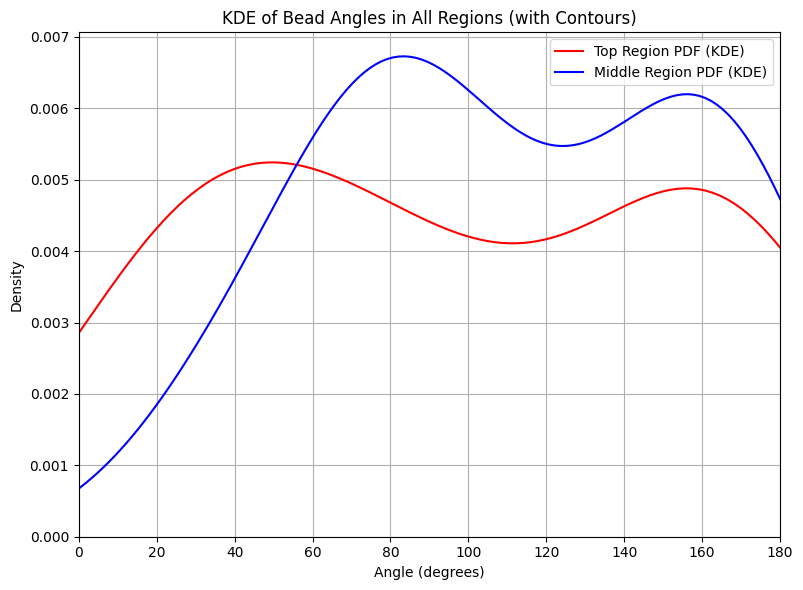

100


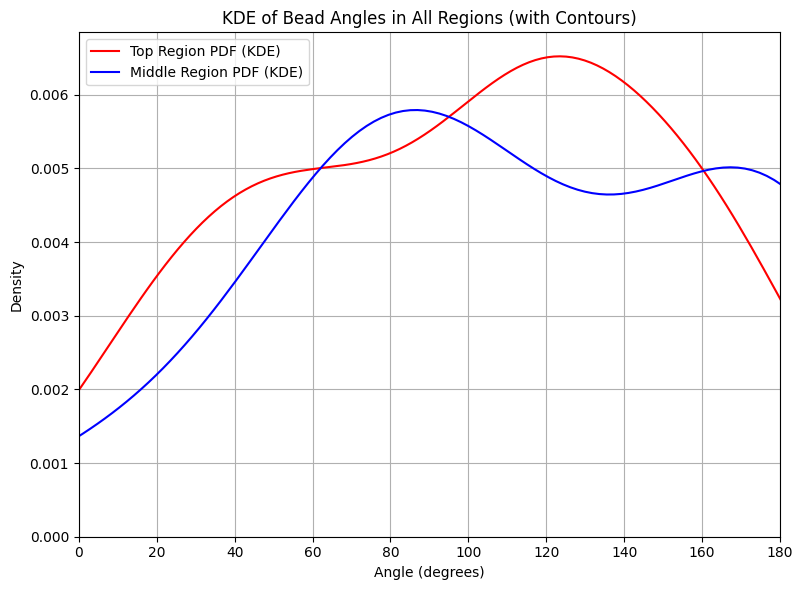

200


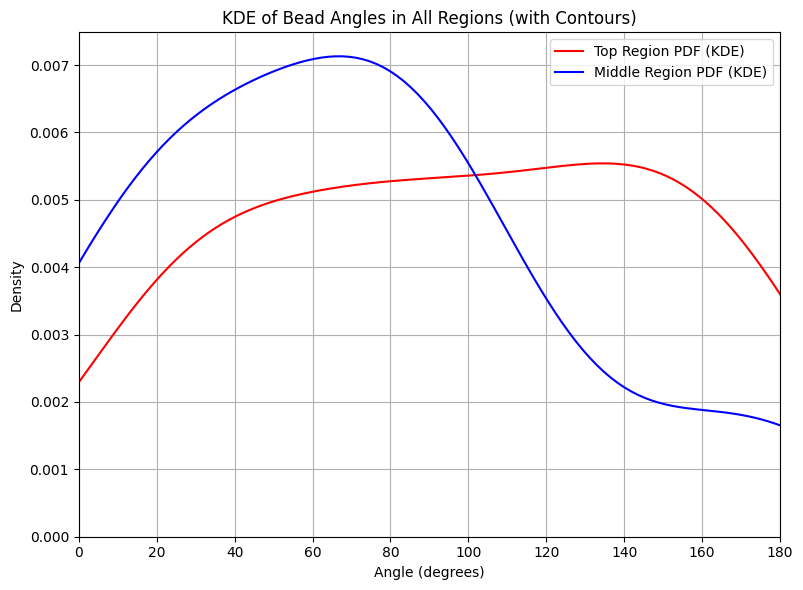

300


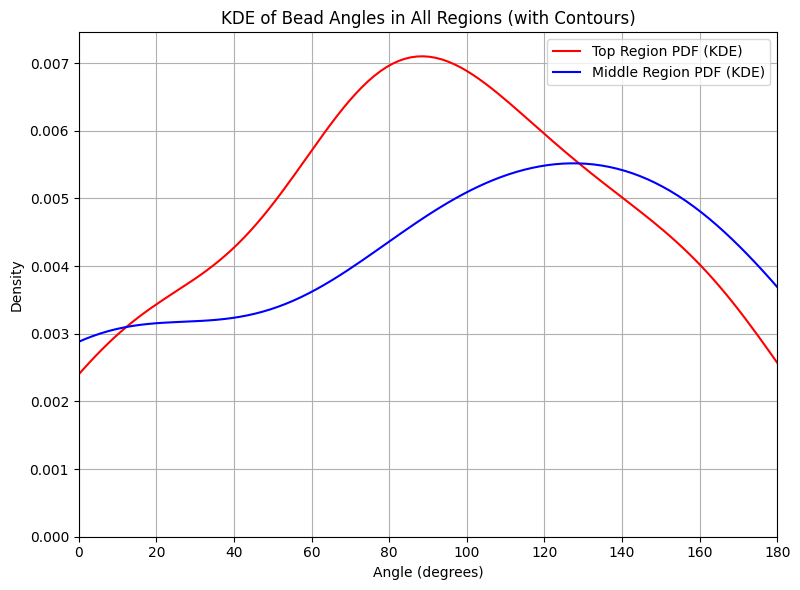

400


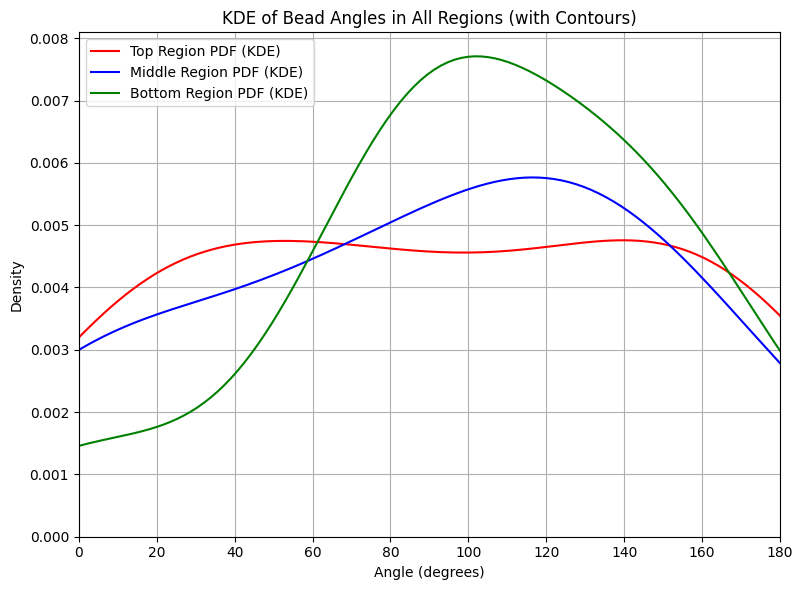

500


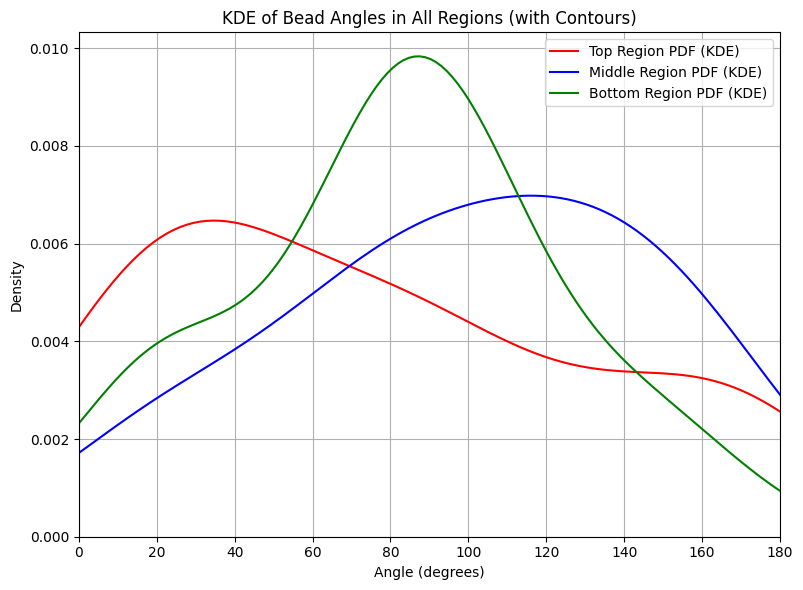

600


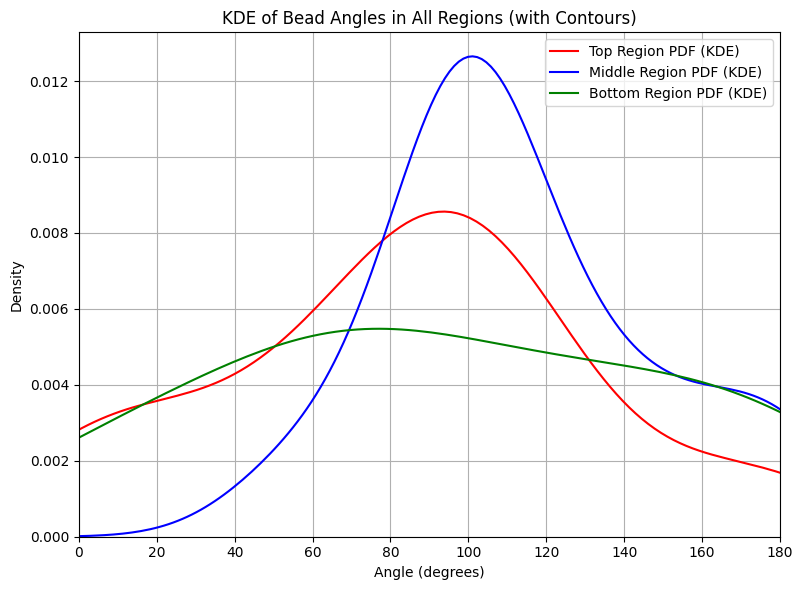

700


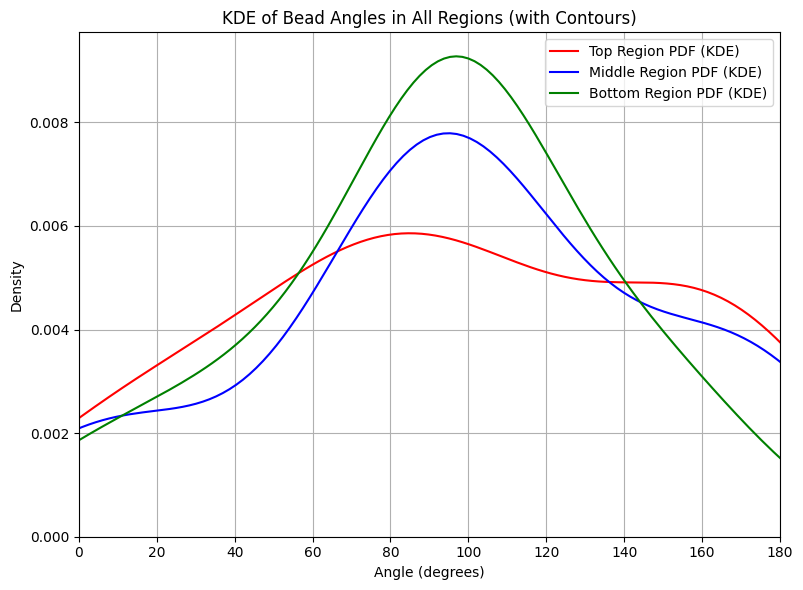

800


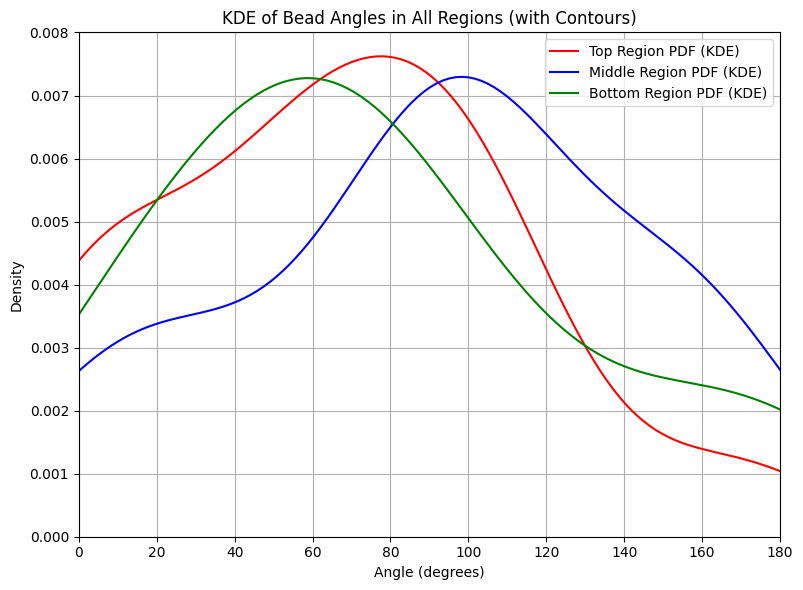

900


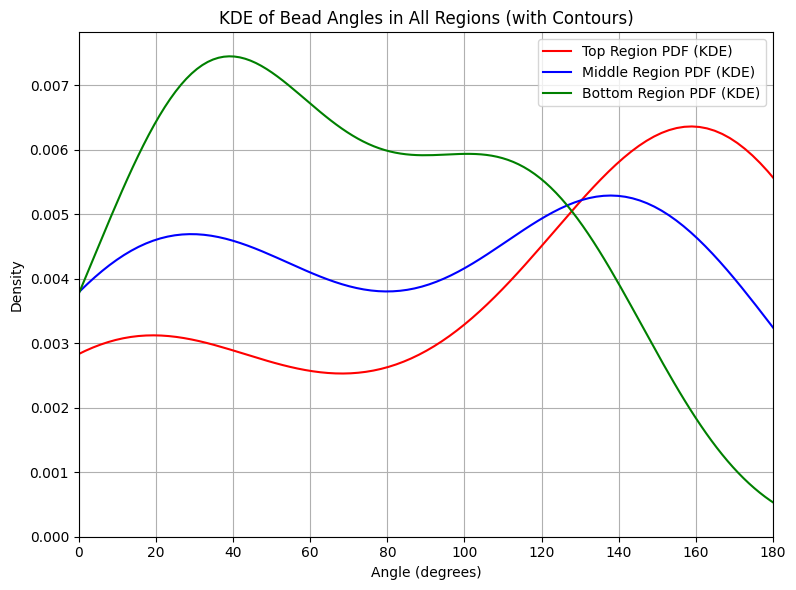

1000


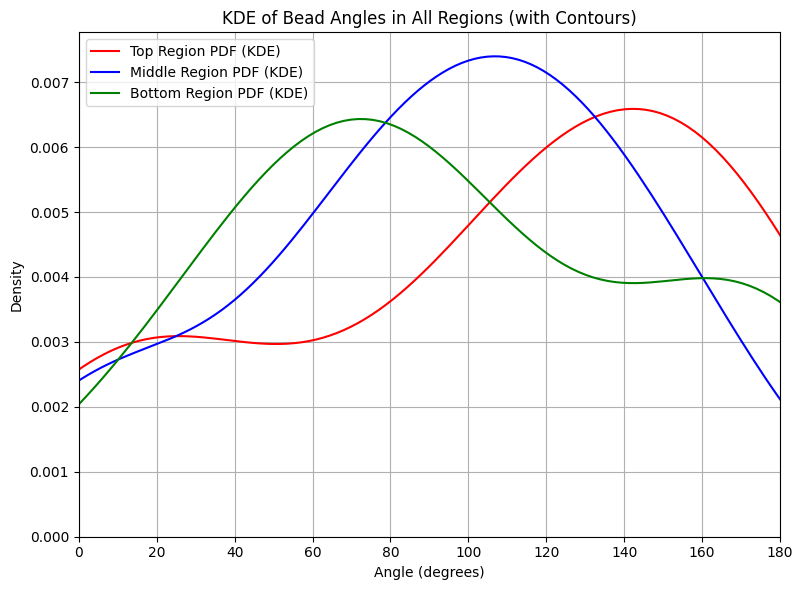

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through frames and regions to accumulate data
for frame, region in angle_dict_region.items():
    if frame % 100 == 0 or frame == 1:
        print(frame)
        #abs_angle_top = [abs(angle) for angle in angle_dict_region[frame]['top']]
        #abs_angle_middle = [abs(angle) for angle in angle_dict_region[frame]['middle']]
        #abs_angle_bottom = [abs(angle) for angle in angle_dict_region[frame]['bottom']]
        
        abs_angle_top = [abs(angle) for angle in angle_dict_region[frame]['top']]
        abs_angle_middle = [abs(angle) for angle in angle_dict_region[frame]['middle']]
        abs_angle_bottom = [abs(angle) for angle in angle_dict_region[frame]['bottom']]

        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Plot all regions on the same axis (ax)
        sns.kdeplot(abs_angle_top, color='red', label='Top Region PDF (KDE)', ax=ax)
        sns.kdeplot(abs_angle_middle, color='blue', label='Middle Region PDF (KDE)', ax=ax)
        sns.kdeplot(abs_angle_bottom, color='green', label='Bottom Region PDF (KDE)', ax=ax)

        ax.set_title(f'KDE of Bead Angles in All Regions (with Contours)')
        ax.set_xlabel('Angle (degrees)')
        ax.set_ylabel('Density')
        ax.grid(True)

        ax.legend()

        # Show the combined plot
        plt.tight_layout()
        plt.xlim(0,180)
        plt.show()


In [15]:
from sklearn.decomposition import PCA
import cv2
import numpy as np

output_path = r'C:\Users\Predator\Desktop\gpu_env_folder\AA_PProject\output\fr18_last30sec_10div.mp4'

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

angle_dict_region_10 = {}
bead_count_per_region_10 = {}

frame_index = 1
highest_bead_y = None  # Variable to store the highest bead's y-coordinate

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    angle_dict_region_10[frame_index] = {f'region_{i}': [] for i in range(1, 11)}
    bead_count_per_region_10[frame_index] = {f'region_{i}': 0 for i in range(1, 11)}

    if frame_index in bounding_boxes.keys():
        boxes = bounding_boxes[frame_index]

        if boxes.nelement() > 0:
            if highest_bead_y is None:
                highest_bead_y = min([int(box[1].item()) for box in boxes])  # y1 is at index 1 in the bounding box
                region_height = (height - highest_bead_y) // 10  # Divide the area from highest bead into 10 equal parts

            division_lines = [highest_bead_y + i * region_height for i in range(10)]

            # Draw the constant division lines and label regions
            for i, line in enumerate(division_lines, start=1):
                cv2.line(frame, (0, line), (width, line), (255, 0, 0), 2)
                cv2.putText(frame, f'Region {i}', (10, line - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            for j, box in enumerate(boxes):
                x1, y1, x2, y2 = [int(item.item()) for item in box]
                roi = frame[y1:y2, x1:x2]

                gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                blurred = cv2.GaussianBlur(gray, (5, 5), 0)
                binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY_INV, 11, 2)

                contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    contour = max(contours, key=cv2.contourArea)
                    contour = contour.reshape(-1, 2)
                    if contour.shape[0] >= 2:
                        pca = PCA(n_components=2)
                        pca.fit(contour)
                        angle = np.arctan2(pca.components_[0, 1], pca.components_[0, 0]) * 180 / np.pi
                        if angle < 0:
                            angle = 180 - abs(angle)

                        center_y = (y1 + y2) // 2

                        for i in range(10):
                            if center_y < highest_bead_y + (i + 1) * region_height:
                                region = f'region_{i + 1}'
                                angle_dict_region_10[frame_index][region].append(angle)
                                bead_count_per_region_10[frame_index][region] += 1
                                break

                        # Draw the bounding box and label
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                        cv2.putText(frame, f'{j+1}: {angle:.2f}°', (x1, y2 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
        else:
            print(f"No bounding boxes for frame {frame_index}")

    out.write(frame)
    print(f"Processing frame {frame_index}")
    frame_index += 1

# Release resources
cap.release()
out.release()


Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing frame 47
Processing frame 48
Processing frame 49
Processing frame 50
Processin

In [23]:
bead_count_per_region_10

{1: {'region_1': 3,
  'region_2': 8,
  'region_3': 8,
  'region_4': 12,
  'region_5': 11,
  'region_6': 4,
  'region_7': 9,
  'region_8': 5,
  'region_9': 7,
  'region_10': 3},
 2: {'region_1': 5,
  'region_2': 7,
  'region_3': 8,
  'region_4': 10,
  'region_5': 10,
  'region_6': 4,
  'region_7': 10,
  'region_8': 4,
  'region_9': 7,
  'region_10': 3},
 3: {'region_1': 3,
  'region_2': 7,
  'region_3': 9,
  'region_4': 10,
  'region_5': 10,
  'region_6': 5,
  'region_7': 9,
  'region_8': 4,
  'region_9': 9,
  'region_10': 4},
 4: {'region_1': 2,
  'region_2': 7,
  'region_3': 10,
  'region_4': 10,
  'region_5': 10,
  'region_6': 5,
  'region_7': 10,
  'region_8': 4,
  'region_9': 9,
  'region_10': 2},
 5: {'region_1': 5,
  'region_2': 10,
  'region_3': 8,
  'region_4': 10,
  'region_5': 9,
  'region_6': 4,
  'region_7': 8,
  'region_8': 7,
  'region_9': 6,
  'region_10': 2},
 6: {'region_1': 5,
  'region_2': 6,
  'region_3': 8,
  'region_4': 11,
  'region_5': 10,
  'region_6': 5,
  're

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through frames and regions to accumulate data
for frame, regions in angle_dict_region_10.items():
    total_beads = 0
    if frame % 100 == 0 or frame == 1:
        print(f"Frame: {frame}")
        # Loop through all 10 regions
        for i in range(1, 11):
            region_key = f'region_{i}'    
            # Print the number of beads in the current region
            bead_count = bead_count_per_region_10[frame][region_key]
            print(f"Region {i}: Number of beads = {bead_count}")
            total_beads += bead_count
        print(f'total bead for frame {frame}: {total_beads}')


Frame: 1
Region 1: Number of beads = 3
Region 2: Number of beads = 14
Region 3: Number of beads = 9
Region 4: Number of beads = 10
Region 5: Number of beads = 10
Region 6: Number of beads = 5
Region 7: Number of beads = 0
Region 8: Number of beads = 0
Region 9: Number of beads = 0
Region 10: Number of beads = 0
total bead for frame 1: 51
Frame: 100
Region 1: Number of beads = 6
Region 2: Number of beads = 12
Region 3: Number of beads = 7
Region 4: Number of beads = 9
Region 5: Number of beads = 8
Region 6: Number of beads = 2
Region 7: Number of beads = 0
Region 8: Number of beads = 0
Region 9: Number of beads = 0
Region 10: Number of beads = 0
total bead for frame 100: 44
Frame: 200
Region 1: Number of beads = 6
Region 2: Number of beads = 12
Region 3: Number of beads = 8
Region 4: Number of beads = 9
Region 5: Number of beads = 7
Region 6: Number of beads = 2
Region 7: Number of beads = 0
Region 8: Number of beads = 0
Region 9: Number of beads = 0
Region 10: Number of beads = 0
total